## 1. Loading the motor claims dataset
<p>“Managing time expectations is the key driver of satisfaction — meaning, a prompt claim settlement is still the best advertisable punch line for insurance firms. While a new era of claims settlement benchmarks are being set with AI, the industry is shifting their attitude towards embracing the real potential of intelligent technologies that can shave-off valuable time and money from the firm’s bottom-line.”</p>
<p>The insurance claims process involves a series of procedures from the time the insurer is alerted to when a settlement is made in which First notice of loss(FNOL) starts the wheel of the claims cycle and is when the policyholder or any other person notifies the insurer of an unfortunate event. In the case of Motor insurance, a driver or Third Party informs the insurance company of a crash that occurred involving a vehicle.</p>
<p>The event will be registered by a claims handler in the Insurance company whose role is to determine the Liability and the  amount of settlement. The claims handler determines the nature and severity of the damage to the policyholder’s car. His assessment relies on various information regarding the 
Incident by the reporter and other details regarding the incident.</p>
<p><strong>The objective of this project is to utilise the historical data of the claims and develop a liability prediction model which would enable the handlers to swiftly decide on Claims liability at FNOL Stage.</strong> </p>

In [1]:
# Import pandas using the usual alias
import pandas as pd 

# Read the dataset from datasets/DataforRFmodel.xlsx in the sheet named 'Data'
claims_raw = pd.read_excel('DataforRFmodel.xlsx', sheet_name='Data')

# Print the data types of claims_raw
print("Data types:")
print(claims_raw.dtypes)

# Print the description of claims_raw
print("\nDescription:")
print(claims_raw.describe())

# Display claims_raw
print("\nDataset:")
claims_raw.head()

Data types:
Claim_number                 object
Excess                      float64
Circumstance_code            object
Organization_notified_by     object
Method_of_notification       object
NCD_indicator                object
Notification_delay            int64
Injury                        int64
TP_vehicle_damaged            int64
Insured_vehicle_damaged       int64
Insured_age                   int64
Estimated_vehicle_value       int64
Liability_group              object
dtype: object

Description:
             Excess  Notification_delay       Injury  TP_vehicle_damaged  \
count   3642.000000         3650.000000  3650.000000         3650.000000   
mean     348.496431           23.859452     0.530959            0.716164   
std      675.302842           27.251420     0.499109            0.450920   
min        0.000000            0.000000     0.000000            0.000000   
25%        0.000000           11.000000     0.000000            0.000000   
50%      250.000000           17.000

,Claim_number,Excess,Circumstance_code,Organization_notified_by,Method_of_notification,NCD_indicator,Notification_delay,Injury,TP_vehicle_damaged,Insured_vehicle_damaged,Insured_age,Estimated_vehicle_value,Liability_group
0,CHC 55530276,1000.0,Insured Vehicle changing lanes,Employee,email,Yes,18,1,1,1,41,13946,Not_Liable
1,NAT 61714811,0.0,Third Party opening door,Nameddriver,Phone,No,5,0,1,1,53,13245,Split_Liable
2,BAX 14109679,0.0,Third Party Hit Insured,Broker,Phone,Yes,23,1,0,1,30,18790,Not_Liable
3,BBD 26987439,0.0,Insured Vehicle changing lanes,Nameddriver,Phone,No,50,1,1,1,51,2998,Split_Liable
4,BLA 41890131,120.0,Insured Vehicle Hit Third Party,Broker,email,No,20,0,1,1,18,17172,Fully_Liable


## 2. Handling missing data
<p>We have now explored the dataset and are familiar with the columns present in the data. For the purpose of this project, we have anonymised the data but you may expect similar features used to predict liability in a motor claim. Pre-processing is a critical step that has to be done before going into modelling. We will perform a series of basic pre-processing steps in the next few cells and prepare the data for modelling.</p>

In [3]:
# Count the number of missing values in each column of claims_raw
n_missing = claims_raw.isnull().sum()
print(f"Number of missing values present in each feature are: \n{n_missing}")

# This code takes a copy of the dataset before we start subsetting
claims = claims_raw.copy(deep = True)
data= claims.to_csv()


# Drop the missing values from the categorical features of claims
categorical_features = ['Circumstance_code', 'Organization_notified_by', 'Method_of_notification', 'NCD_indicator']
claims = claims.dropna(subset=categorical_features)

# In the Excess feature, fill missing values with 0
claims['Excess'] = claims['Excess'].fillna(0)

# See the updated dataset
claims.info()

Number of missing values present in each feature are: 
Claim_number                 0
Excess                       8
Circumstance_code            9
Organization_notified_by    12
Method_of_notification       7
NCD_indicator                2
Notification_delay           0
Injury                       0
TP_vehicle_damaged           0
Insured_vehicle_damaged      0
Insured_age                  0
Estimated_vehicle_value      0
Liability_group              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_number              3620 non-null   object 
 1   Excess                    3620 non-null   float64
 2   Circumstance_code         3620 non-null   object 
 3   Organization_notified_by  3620 non-null   object 
 4   Method_of_notification    3620 non-null   object 
 5   NCD_indicator             3620 n

## 3. Removing Duplicate Claims
<p>Now that we have dealt with missing values, let us find out about any duplicate claims present in the dataset and remove them if present. Also we will remove the unwanted features from the dataset and keep only the required features to build the model. This will usually be the unique 'id' column in the dataset.</p>

In [4]:
# Count the duplicate claim numbers in the dataset
n_dupes = claims.duplicated(subset=['Claim_number']).sum()
print(f"There are {n_dupes} duplicates in the Claim_number column.\n")

# Drop the duplicate claims from the dataset
claims_no_dupes = claims.drop_duplicates(subset=['Claim_number'])

# Drop the entire Claim_number column from claims_no_dupes
claims_no_dupes = claims_no_dupes.drop(columns = ['Claim_number'])

# See the updated dataset
claims_no_dupes.info()

There are 10 duplicates in the Claim_number column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 0 to 3649
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Excess                    3610 non-null   float64
 1   Circumstance_code         3610 non-null   object 
 2   Organization_notified_by  3610 non-null   object 
 3   Method_of_notification    3610 non-null   object 
 4   NCD_indicator             3610 non-null   object 
 5   Notification_delay        3610 non-null   int64  
 6   Injury                    3610 non-null   int64  
 7   TP_vehicle_damaged        3610 non-null   int64  
 8   Insured_vehicle_damaged   3610 non-null   int64  
 9   Insured_age               3610 non-null   int64  
 10  Estimated_vehicle_value   3610 non-null   int64  
 11  Liability_group           3610 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 366.6+ KB


## 4. Preparing the model
<p>We have certain categorical variables such as <code>Circumstance code</code>, <code>NCD_Indicator</code>, <code>OrganizationNotifiedBy</code> and <code>MethodofNotification</code>. We need to convert these categorical variables into numerical variables which the model could understand.</p>
<p>In order to convert this, we use one hot encoding. First we select the corresponding categorical variables and store these variables into a new dataframe. Using this dataframe, perform one hot encoding and join this newly created dataframe with the original dataframe. We will then drop the categorical features from the joined dataframe as these are no longer required. 
The joined dataframe will only contain numerical type columns which the model will be fitted on. </p>

In [5]:
# Import train_test_split() from sklearn.model_selection
from sklearn.model_selection import train_test_split 

# Get the Liability_group column as the response variable
response = claims_no_dupes['Liability_group'] # should this be transformed to integers? 

# Get all columns except Liability_group as the features
features = claims_no_dupes.drop(columns = 'Liability_group')

# Get dummies for categorical features
dummies = pd.get_dummies(features, drop_first=True )


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dummies,response , test_size= 0.3, random_state=16660902)

## 5. Training the model
<p>Our data is now prepared and ready for modelling, lets understand the different ways to approach model training. The problem we are trying to solve is multi-class classification. Therefore, modelling techniques that are relevant to build a model for this type of data have been explored. Upon training multiple models, Random Forest, a bagging technique that uses ensemble of decision trees under the hood to learn from historical data has been used here. Random Forest has given us better performance over other models, it is easier to understand and interpret to the stakeholders which is a great advantage.</p>
<p>Now, let us go ahead with model training using Random Forest Classifier.</p>
<p>To achieve this, we first initialise the Random Forest model. Secondly, we train the model using the train set and finally, predict the Liability Group using the test dataset.</p>

In [6]:
# Import RandomForestClassifier() from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
rf = RandomForestClassifier(random_state= 17551101)

# Fit the random forest model to the training set
rf.fit(X_train, y_train)

# Predict the liabilities from the test features
y_pred = rf.predict(X_test)

# See the prediction counts
pd.Series(y_pred).value_counts()

Fully_Liable    455
Not_Liable      412
Split_Liable    216
dtype: int64

## 6. Evaluating the model
<p>Now we have trained the model. Lets evaluate the model using the perfomance metrics. We check the Confusion Matrix first to understand True Positives, True Negatives, False Positives and False Negatives followed by classification report which given a detailed output of different metrics for each class.</p>
<p>In this case we focus on optimising the recall i.e whether the model is able to identify Fully Liable as Fully Liable and so on.</p>

In [8]:
# Import classification_report(), confusion_matrix() and accuracy_score() from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get the accuracy score
rf_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {rf_accuracy_score:.4f}\n")

# Get the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{rf_confusion_matrix}\n")

# Get the classification report
rf_classification_report = classification_report(y_test, y_pred)
print(f"Classification report:\n{rf_classification_report}")

Accuracy score: 0.8024

Confusion matrix:
[[430  43  13]
 [ 20 297  61]
 [  5  72 142]]

Classification report:
              precision    recall  f1-score   support

Fully_Liable       0.95      0.88      0.91       486
  Not_Liable       0.72      0.79      0.75       378
Split_Liable       0.66      0.65      0.65       219

    accuracy                           0.80      1083
   macro avg       0.77      0.77      0.77      1083
weighted avg       0.81      0.80      0.80      1083



## 7. Testing for over or underfitting
<p>We can see that our model is able to classify the liability group with 80% accuracy. Lets find out whether the model is overfitting or underfitting using K-fold Cross Validation.</p>

In [9]:
# Import KFold() and cross_val_score() from sklearn.model_selection
from sklearn.model_selection import KFold, cross_val_score

# Setup up k-fold cross-validation with 10 splits, using shuffling
k_folds = KFold(n_splits=10, shuffle=True, random_state= 18420505 )

# Calculate the cross-validation score for each fold
accuracy_by_fold = cross_val_score(rf,dummies,response , cv=k_folds )

# See the results
print(accuracy_by_fold)
print(f"Accuracy: {accuracy_by_fold.mean():.1%}")

[0.82271468 0.83379501 0.79224377 0.83379501 0.81440443 0.79501385
 0.82548476 0.80886427 0.79778393 0.81717452]
Accuracy: 81.4%


## 8. Hyperparameter tuning
<p>We have figured that the model is working properly by observing the K-Fold cross validation results.</p>
<p>Performance of machine learning models can be optimized by tuning the model's hyperparameters. We have many hyperparameters for random forests, but the most important is often the number of features we sample at each split (<code>RandomForestClassifier</code>'s <code>max_features</code> argument).</p>
<p>Usually, we can use scikit-learn's <code>GridSearchCV()</code> or <code>RandomizedSearchCV()</code> method to search hyperparameters. In this case we want to fit our models on the train data and evaluate on the test data. So we will use scikit-learn's <code>ParameterGrid()</code> function to create combinations of hyperparameters to search.</p>

In [10]:
# Import ParameterGrid() from sklearn.model_selection
from sklearn.model_selection import ParameterGrid

# Import argmax() from numpy
import numpy as np

# Complete the hyperparameter grid
hyperparameter_grid = ParameterGrid({
    'n_estimators': [100, 200, 400], 
    'max_depth': [10,20,40], 
    'max_features': [4,8,16], 
    'random_state': [19120415]
})

# This will store the model results
test_scores = []

# Loop over hyperparameter_grid
for this_grid in hyperparameter_grid:
    rf.set_params(**this_grid)              
    # Fit the random forest model to the training dataset
    rf.fit(X_train, y_train)
    # Calculate the random forest score on the test dataset
    this_score = rf.score(X_test,y_test)
    # Append the score from this iteration
    test_scores.append(this_score)

# Get the index of the highest test score
best_idx = np.argmax(test_scores)

# Get the value of the highest test score
best_test_score = test_scores[best_idx]

# Get the hyperparameter grid element with the highest test score
best_hyperparameters = hyperparameter_grid[best_idx]

# See the results
print(f"Highest test score: {best_test_score:.3f}")
print(f"Best hyperparameters: {best_hyperparameters}")

Highest test score: 0.817
Best hyperparameters: {'random_state': 19120415, 'n_estimators': 100, 'max_features': 16, 'max_depth': 10}


## 9. Running the best model
<p>We have optimized the parameters using sklearn's <code>ParameterGrid</code>, trying several random values to find the ones that give better results and increase the overall performance of the model.</p>

In [11]:
# Create a random forest classifier object with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators = 100, max_features= 16, max_depth = 10, random_state=19120415)

print(best_rf)

# Fit this best model to the training set
best_rf.fit(X_train, y_train)

# Predict the responses from the testing set
best_y_pred = best_rf.predict(X_test)

# Get the accuracy score
best_rf_accuracy_score = accuracy_score(y_test, best_y_pred)
print(f"Best accuracy score: {best_rf_accuracy_score:.2%}\n")

# Get the confusion matrix
best_rf_confusion_matrix = confusion_matrix(y_test, best_y_pred)
print(f"Best confusion matrix:\n{best_rf_confusion_matrix}\n")

# Get the classification report
best_rf_classification_report = classification_report(y_test, best_y_pred)
print(f"Best classification report:\n{best_rf_classification_report}")

RandomForestClassifier(max_depth=10, max_features=16, random_state=19120415)
Best accuracy score: 81.72%

Best confusion matrix:
[[431  49   6]
 [ 12 316  50]
 [  4  77 138]]

Best classification report:
              precision    recall  f1-score   support

Fully_Liable       0.96      0.89      0.92       486
  Not_Liable       0.71      0.84      0.77       378
Split_Liable       0.71      0.63      0.67       219

    accuracy                           0.82      1083
   macro avg       0.80      0.78      0.79      1083
weighted avg       0.83      0.82      0.82      1083



## 10. Examining feature importance
<p>It is important to identify which features are most important in predicting the results.</p>

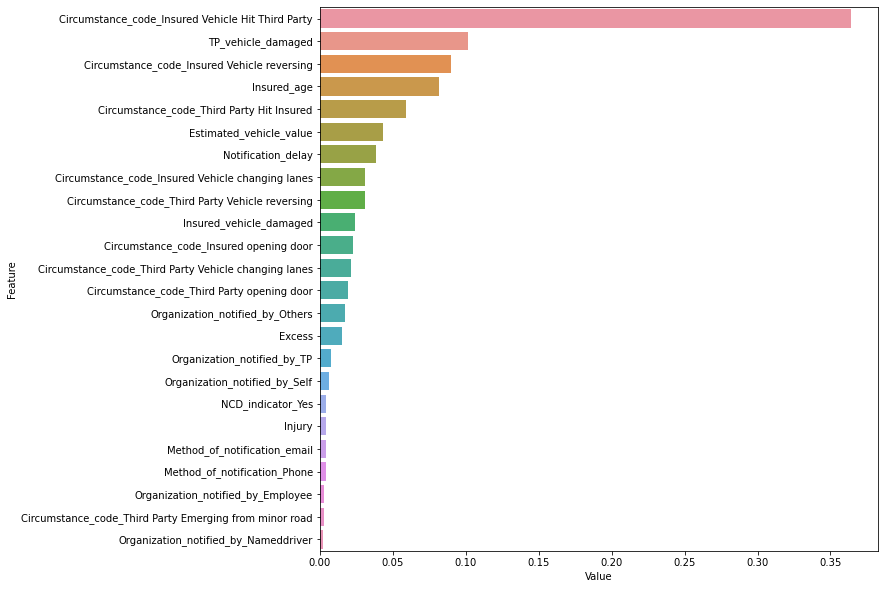

In [12]:
# Import seaborn and matplotlib.pyplot using the usual alias
import matplotlib.pyplot as plt
import seaborn as sns

# Code provided to increase the plot size for better legibility
plt.rcParams['figure.figsize'] = (10, 10)

# Create a DataFrame from a dictionary
feature_importances = pd.DataFrame.from_dict({
    # Set the Feature column to the columns of dummies
    'Feature': dummies.columns,
    # Set the Value column to the feature importances of the best model
    'Value': best_rf.feature_importances_
})

# Sort feature_importances by the Value column
feature_importances_sorted = feature_importances.sort_values(by='Value', ascending=False)

# Using feature_importances_sorted, draw a barplot of Feature vs. Value
sns.barplot(data= feature_importances_sorted, x='Value', y='Feature')
plt.show()

## 11. More model explanations with SHAP
<p>Congratulations on making it to the end! In this capstone project you have learnt how to read and prepare the data, build a Random Forest classifier and tune the model to optimise performance. In order to build a multi-class classification model it is very important to understand the business context and figure out the best metrics that should be optimised to understand the model performance. Along with this, understanding the data and choosing the best class balancing method will further increase the model’s performance.</p>
<p>We encourage you to test other classification models such as Ridge Classifier, Gradient Boosted classifiers and compare how different models perform. To increase the model performance further, explore how different models are tuned and other techniques like GridsearchCV, Bayesian Optimisation, etc. used for hyper-parameter tuning. Also, we recommend you to explore the SHAP library in detail and check out different plots like decision plot, force plot, partial dependency plots, etc. to explain the model’s predictions.</p>
<p>To conclude this project, you're going to get a preview of how SHAP works.</p>
<p>SHAP which stands for <strong>SH</strong>apley <strong>A</strong>dditive ex<strong>P</strong>lanations is a solution concept used in Game Theory that involves fairly distributing both gains and costs to several actors working in coalition. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.</p>
<p>Now lets see how the Features in our dataset contribute towards the predicting liability group.</p>

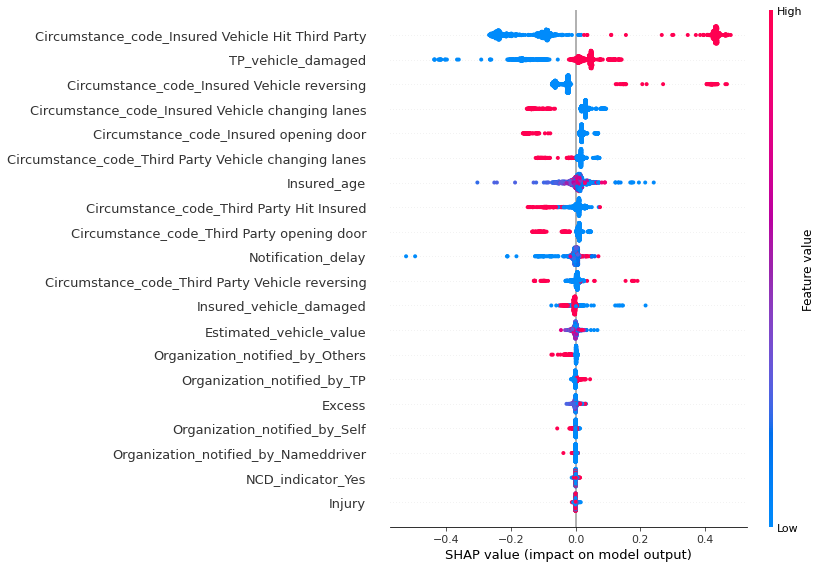

In [14]:
# Import TreeExplainer, and summary_plot from shap
import shap
from shap import TreeExplainer, summary_plot

# Create a tree explainer object from the best model
explainer = TreeExplainer(best_rf)

# Get the shap values from the testing features, without checking additivity
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Draw a summary plot of the first shap value, with the testing features, getting class names from the best model
shap.summary_plot(shap_values[0], X_test, class_names = best_rf.classes_)

We encourage you to test other classification models such as Ridge Classifier, Gradient Boosted classifiers and compare how different models perform. To increase the model performance further, explore how different models are tuned and other techniques like GridsearchCV, Bayesian Optimisation, etc. used for hyper-parameter tuning. Also, we recommend you to explore the SHAP library in detail and check out different plots like decision plot, force plot, partial dependency plots, etc. to explain the model’s predictions.